# Download & Process MIMIC II Waveform Data

Date: 02.01.2020

Objective: Download and process the the waveform data for our HISP MIMIC Project

**Reference:** https://github.com/MIT-LCP/wfdb-python/blob/master/demo.ipynb

MIMICII Matched Subjects with wafeform data: https://archive.physionet.org/physiobank/database/mimic2wdb/matched/

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb

The **rdsamp** function exists as a simple alternative to **rdrecord** for the common purpose of extracting the physical signals and a few important descriptor fields. Thus, **rdrecord** gives several more attributes of the data

Note: We can load the whole timeseries by removing the sampfrom and sampto parameter.

In [4]:
# Can also read the same files hosted on PhysioBank (takes long to stream the many large files)
record = wfdb.rdsamp('s10042-2763-04-22-10-27', sampfrom=1000000, sampto=1100000, pb_dir = 'mimic2wdb/matched/s10042/')
record

(array([[ 0.04854369,         nan, -0.09482759],
        [ 0.17475728,         nan, -0.06034483],
        [ 0.31067961,         nan, -0.20689655],
        ...,
        [-0.10679612,         nan,  0.14655172],
        [-0.09708738,         nan,  0.12068966],
        [-0.08737864,         nan,  0.12931034]]),
 {'fs': 125,
  'sig_len': 100000,
  'n_sig': 3,
  'base_date': datetime.date(2763, 4, 22),
  'base_time': datetime.time(12, 40, 42, 587000),
  'units': ['mV', None, 'mV'],
  'sig_name': ['II', 'III', 'V'],
  'comments': ['<age>: 71 <sex>: M']})

In [5]:
# Can also read the same files hosted on PhysioBank (takes long to stream the many large files)
record = wfdb.rdrecord('s10042-2763-04-22-10-27', sampfrom=1000000, sampto=1100000, pb_dir = 'mimic2wdb/matched/s10042/')
record

Examine the dictionary of the attributes contained wiethin the record

In [6]:
display(record.__dict__)

{'record_name': 's10042-2763-04-22-10-27',
 'n_sig': 3,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 100000,
 'base_time': datetime.time(12, 40, 42, 587000),
 'base_date': datetime.date(2763, 4, 22),
 'comments': ['<age>: 71 <sex>: M'],
 'sig_name': ['II', 'III', 'V'],
 'p_signal': array([[ 0.04854369,         nan, -0.09482759],
        [ 0.17475728,         nan, -0.06034483],
        [ 0.31067961,         nan, -0.20689655],
        ...,
        [-0.10679612,         nan,  0.14655172],
        [-0.09708738,         nan,  0.12068966],
        [-0.08737864,         nan,  0.12931034]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': None,
 'fmt': ['80', None, '80'],
 'samps_per_frame': None,
 'skew': None,
 'byte_offset': None,
 'adc_gain': [103.0, None, 116.0],
 'baseline': [0, None, 0],
 'units': ['mV', None, 'mV'],
 'adc_res': None,
 'adc_zero': None,
 'init_value': None,
 'checksum': None,
 'block_size': None,
 'layout': 'variable',

Can use the below function to plot signals. **sampfrom** and **sampto** allow us to pick the sig_len of interest, but we can run without to get the whole time series

In [12]:
k = record.p_signal
k.size

300000

In [7]:
signals2.shape # confirms us how large sample length is
fields2 # shows us the attributes of the signal

{'fs': 125,
 'sig_len': 100000,
 'n_sig': 3,
 'base_date': datetime.date(2763, 4, 22),
 'base_time': datetime.time(12, 40, 42, 587000),
 'units': ['mV', None, 'mV'],
 'sig_name': ['II', 'III', 'V'],
 'comments': ['<age>: 71 <sex>: M']}

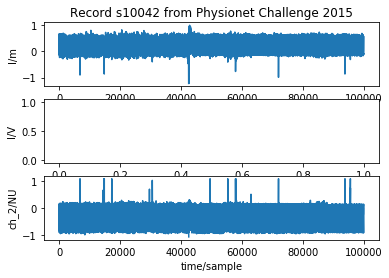

In [8]:
wfdb.plot_items(signals2, sig_name = 'II', sig_units = 'mV', title='Record s10042 from Physionet Challenge 2015') 

The below gives a nice directory of the different wave form databases

In [9]:
# Examine the different waveform databases hosted by physionet
dbs = wfdb.get_dbs()
display(dbs)

[['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database [sample excluded record]'],
 ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['chfdb', 'BIDMC Congestive Heart Failure Database'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['capslpdb', 'CAP Sleep Database'],
 ['crisdb', 'CAST RR Interval Sub-Study Database'],
 ['cves', 'Cerebral Vasoregulation in Elderly with Stroke'],
 ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'],
 ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'],
 ['challenge/2010/set-a', 'Challenge 2010 Training Set A'],
 ['challenge/2010/set-b', 'Challenge 2010 Test Set B'],
 ['challenge/2010/set-c', 'Challenge 2010 Test Set C'],
 ['challenge/2011/sim', 'Challenge 2011 Pilot Set'],
 ['challenge/2011/set-a', 'Challenge 2011 Training Set A'],
 ['challenge/2011/set-b', 'Chall

The below code looks to be a way to download specific files. This may be a more conveint way of downloading our patient cohort of interest. Perhaps we could use a forloop with the files we want.

**NEXT STEPS: Create a list of the subject_ids + waveform data**

In [11]:
# Demo 18 - Download specified files from a Physiobank database

# Make a temporary download directory in your current working directory
#os.chdir('C:\\Users\\User\\Box Sync\\Projects\\Mimic_HSIP\\Waveform_Data')

# The files to download
file_list = ['s10042\s10042-2763-04-20-10-41.hea']

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'dl_dir_chf')

# Download the listed files
wfdb.dl_files('mimic2wdb/matched', dl_dir, file_list)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))
#display(os.listdir(os.path.join(dl_dir, 'data')))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Box Sync\\Projects\\Mimic_HSIP\\Waveform_Data'

In [1]:
wfdb.dl_database('mimic3wdb/matched', os.getcwd())

NameError: name 'wfdb' is not defined